In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import time
from decimal import Decimal

In [ ]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
def trap_integration(xmin, xmax, N):
    # Computes integration points and weights for trapezoid scheme
    # integrates from xmin to xmax with N integration points
    uv = np.linspace(xmin, xmax, N)
    wgtv = np.ones(N)
    wgtv[[0, N - 1]] = 1 / 2
    wgtv = wgtv * (xmax - xmin) / (N - 1)
    return uv, wgtv

### Define functions WITH control variate

In [3]:
def char_func_cv(v, u, T, theta, eta, z_0):
    gamma = np.sqrt(theta**2 - 2 * eta**2 * v)
    A = 1 / eta**2 * theta * z_0 * (2 * np.log(2 * gamma / (theta + gamma - np.exp(-gamma * T)*(theta - gamma))) + (theta - gamma) * T)
    B = 2 * v * (1 - np.exp(-gamma * T)) / ((theta + gamma) * (1 - np.exp(-gamma * T)) + 2 * gamma * np.exp(-gamma * T))
    return np.exp(A + B * z_0)

def q_func_cv(u, T, theta, eta, z_0, lambd, b):
    return char_func_cv(1/2 * (lambd * b)**2 * u * (u - 1), u, T, theta, eta, z_0) - np.exp(1/2 * lambd**2 * b**2 * z_0 * T * u * (u - 1))

### Define functions WITHOUT control variate

In [4]:
def char_func_nocv(v, u, T, theta, eta, z_0):
    gamma = np.sqrt(theta**2 - 2 * eta**2 * v)
    A = 1 / eta**2 * theta * z_0 * (2 * np.log(2 * gamma / (theta + gamma - np.exp(-gamma * T)*(theta - gamma))) + (theta - gamma) * T)
    B = 2 * v * (1 - np.exp(-gamma * T)) / ((theta + gamma) * (1 - np.exp(-gamma * T)) + 2 * gamma * np.exp(-gamma * T))
    return np.exp(A + B * z_0)

def q_func_nocv(u, T, theta, eta, z_0, lambd, b):
    return char_func_nocv(1/2 * (lambd * b)**2 * u * (u - 1), u, T, theta, eta, z_0)

### Set inputs

In [14]:
# inputs
b = 0.5
lambd = 0.8
eta = 0.5
theta = 0.5
z_0 = 1

expiry = 1
tenor = 5

S = 0.05
L = S
mness = 0 / 10000
K = S + mness

S_prime = b * S + (1 - b) * L
K_prime = b * K + (1 - b) * L

xmin = 0
xmax = 20
int_points = 10000
[omega, wgt] = trap_integration(xmin, xmax, int_points)

### Compare integrals

In [15]:
xmin = 0
xmax = 40
int_points_2 = 50
[omega_2, wgt_2] = trap_integration(xmin, xmax, int_points_2)

# with control variate
start_time_cv = time.time()

integrand_cv_1 = np.real((np.exp((1/2 + 1j * omega) * np.log(S_prime / K_prime)) * q_func_cv(1/2 + 1j * omega, expiry, theta, eta, z_0, lambd, b)) / (omega**2 + 1/4))
integral_cv_1 = sum(wgt * integrand_cv_1)

stop_time_cv = time.time()
time_cv = stop_time_cv - start_time_cv
print('Computational time with control variate = ', '%.4f' % time_cv, 'seconds')

integrand_cv_2 = np.real((np.exp((1/2 + 1j * omega_2) * np.log(S_prime / K_prime)) * q_func_cv(1/2 + 1j * omega_2, expiry, theta, eta, z_0, lambd, b)) / (omega_2**2 + 1/4))
integral_cv_2 = sum(wgt_2 * integrand_cv_2)

# without control variate
start_time_cv = time.time()

integrand_nocv_1 = np.real((np.exp((1/2 + 1j * omega) * np.log(S_prime / K_prime)) * q_func_nocv(1/2 + 1j * omega, expiry, theta, eta, z_0, lambd, b)) / (omega**2 + 1/4))
integral_nocv_1 = sum(wgt * integrand_nocv_1)

stop_time_cv = time.time()
time_cv = stop_time_cv - start_time_cv
print('Computational time without control variate = ', '%.4f' % time_cv, 'seconds', '\n')

integrand_nocv_2 = np.real((np.exp((1/2 + 1j * omega_2) * np.log(S_prime / K_prime)) * q_func_nocv(1/2 + 1j * omega_2, expiry, theta, eta, z_0, lambd, b)) / (omega_2**2 + 1/4))
integral_nocv_2 = sum(wgt_2 * integrand_nocv_2)

residual_cv = integral_cv_1 / integral_cv_2 - 1
residual_nocv = integral_nocv_1 / integral_nocv_2 - 1

print(' Integral with control variate = ', integral_cv_1, 
      '\n', 'Integral without control variate = ', integral_nocv_1)

print('\n', 'Residual with control variate = ', "{:.2E}".format(Decimal(residual_cv)))
print(' Residual with no control variate = ', residual_nocv)

Computational time with control variate =  0.0080 seconds
Computational time without control variate =  0.0060 seconds 

 Integral with control variate =  0.01363961235398867 
 Integral without control variate =  2.070505812358024

 Residual with control variate =  4.60E-9
 Residual with no control variate =  -0.06198789406456906


### Plots

In [11]:
# latex_width = 6.69423 inches
# latex_height = 
w = 6.69423 * 5.2/10
golden_ratio = (5**.5 - 1) / 2
h = 6.69423 * 8/10 * golden_ratio
h

3.309809334807367

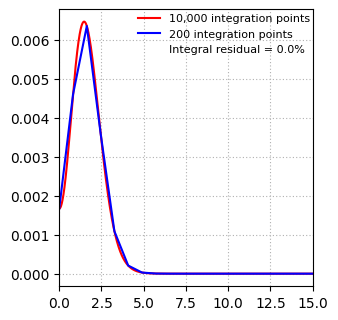

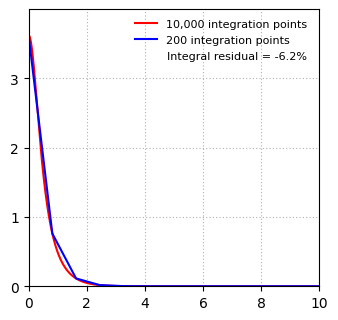

In [16]:
fig, ax = plt.subplots(1,1, figsize=(w,h))

# ax.set_yticks(np.arange(0, 0.0010, 0.0001))
ax.set_xlim(min(omega), 15)
# ax.set_ylim(0, 0.0009)
ax.grid(ls = (0,(1,2)))
plt.plot(omega, integrand_cv_1, color = 'r', label = '10,000 integration points')
plt.plot(omega_2, integrand_cv_2, color = 'b', label = '200 integration points')
plt.text(0.435, 0.845, 'Integral residual = '+str(round(residual_cv,4)*100)+'%', fontsize = 8, transform=ax.transAxes) 
plt.legend(bbox_to_anchor=(0.27,1.02), frameon=False, fontsize=8)
fig.tight_layout()
# plt.savefig('C:/Users/Mikkel/OneDrive/CBS/CBS - FIN/THESIS/Main/python/billeder/int_cv200.pgf')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(w,h))

ax.set_yticks(np.arange(0, max(integrand_nocv_1)*1.05, 1.0))
ax.set_xlim(min(omega), 10)
ax.set_ylim(0, 4)
ax.grid(ls = (0,(1,2)))
plt.plot(omega, integrand_nocv_1, color = 'r', label = '10,000 integration points')
plt.plot(omega_2, integrand_nocv_2, color = 'b', label = '200 integration points')
plt.text(0.475, 0.82, 'Integral residual = '+str(round(residual_nocv,4)*100)+'%', fontsize = 8, transform=ax.transAxes) 
plt.legend(bbox_to_anchor=(0.33,1),frameon=False, fontsize=8)
fig.tight_layout()
# plt.savefig('C:/Users/Mikkel/OneDrive/CBS/CBS - FIN/THESIS/Main/python/billeder/int_nocv200.pgf')
plt.show()

### Price test (without annuity)

In [108]:
# Black 1976 call price in qG model
def call_black76(F, T, K, lambd, b, t = 0):
    sigma_black = lambd * b     # set volatility as the qG model
    d1 = (np.log(F / K) + 1/2 * sigma_black**2 * (T - t)) / (sigma_black * np.sqrt(T - t))
    d2 = d1 - sigma_black * np.sqrt(T - t)
    return F * norm.cdf(d1) - K * norm.cdf(d2)

# price with control variate
call_black = call_black76(S_prime, expiry, K_prime, lambd, b, t = 0)
price_cv = 1/b * (call_black - K_prime / np.pi * integral_cv_2)

# price without control variate
price_nocv = 1/b * (S_prime - K_prime / np.pi * integral_nocv_2)

print('Price with = ', price_cv)
print('Price without = ', price_nocv)

Price with =  0.015734082869968333
Price without =  0.011378713221760234
